In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



## Нелинейный SVR

In [16]:
# Создание искусственных данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))

# Создание сетки для построения графика
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [33]:
# Обучение SVR, опорные вектора, регрессия
svr_linear = SVR(kernel='linear')  # Используем linear
svr_linear.fit(X, y)

# Предсказание для сетки
y_pred_linear = svr_linear.predict(X_test)

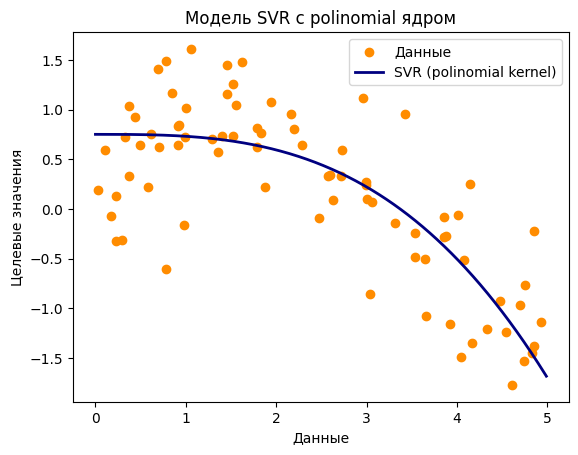

In [27]:
# Обучение SVR, опорные вектора, регрессия
svr_poly = SVR(kernel='poly')  # Используем радиальное базисное ядро (RBF)
svr_poly.fit(X, y)

# Предсказание для сетки
y_pred_poly = svr_poly.predict(X_test)

# Построение графика
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_test, y_pred_poly, color='navy', lw=2, label='SVR (polinomial kernel)')
plt.xlabel('Данные')
plt.ylabel('Целевые значения')
plt.title('Модель SVR с polinomial ядром')
plt.legend()
plt.show()

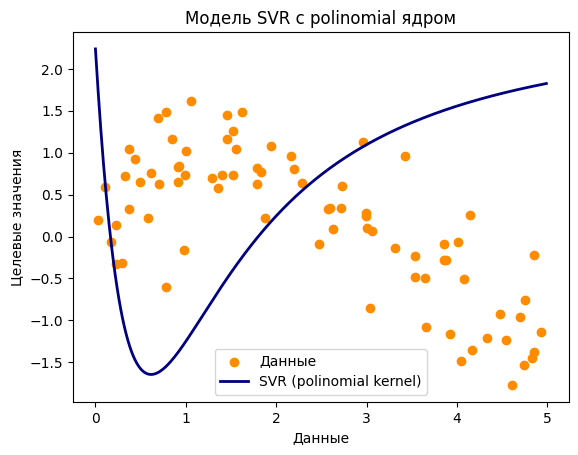

In [9]:
# Обучение SVR, опорные вектора, регрессия
svr_sigmoid = SVR(kernel='sigmoid', coef0=1.0)  # Используем sigmoid
svr_sigmoid.fit(X, y)

# Предсказание для сетки
y_pred_sigmoid = svr_sigmoid.predict(X_test)

# Построение графика
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_test, y_pred_sigmoid, color='navy', lw=2, label='SVR (polinomial kernel)')
plt.xlabel('Данные')
plt.ylabel('Целевые значения')
plt.title('Модель SVR с polinomial ядром')
plt.legend()
plt.show()

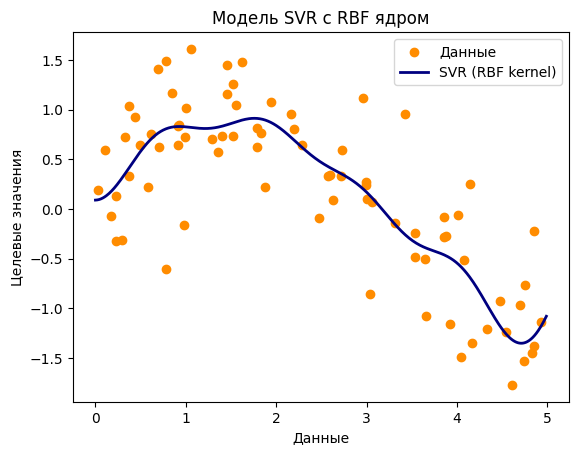

In [28]:
# Обучение SVR, опорные вектора, регрессия
svr = SVR(kernel='rbf', C=100, gamma='auto')  # Используем радиальное базисное ядро (RBF)
svr.fit(X, y)

# Предсказание для сетки
y_pred_rbf = svr.predict(X_test)

# Построение графика
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_test, y_pred_rbf, color='navy', lw=2, label='SVR (RBF kernel)')
plt.xlabel('Данные')
plt.ylabel('Целевые значения')
plt.title('Модель SVR с RBF ядром')
plt.legend()
plt.show()


In [19]:
y_dicr = np.round(y)
y_dicr

array([ 0.,  1., -0.,  0., -0., -0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -0.,  1.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1., -0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
       -1.,  0., -0.,  1., -0., -0., -0., -1., -0., -0., -0., -1., -0.,
       -1., -1.,  0., -1., -1., -1., -1., -2., -1., -2., -1., -1., -0.,
       -1., -1.])

In [20]:
from sklearn.svm import l1_min_c, LinearSVR

# Получить минимальное значение параметра C для L1 регуляризации
min_c = l1_min_c(X, y_dicr, loss='log')
print(min_c)

0.010855838254674939


In [26]:
# Использовать минимальное значение параметра C при обучении LinearSVC с L1 регуляризацией
model = SVR(C=min_c, kernel='linear')
model.fit(X, y)

# Вывести значения параметров модели
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Проверка количества ненулевых весов (разреженность модели)
non_zero_coefficients = np.sum(model.coef_ != 0)
print("Number of non-zero coefficients:", non_zero_coefficients)


Intercept: [0.93362727]
Coefficients: [[-0.28922646]]
Number of non-zero coefficients: 1


In [37]:
# Вывести значения параметров модели
print("Intercept svr_poly:", svr_poly.intercept_)

# Вывести значения параметров модели
print("Intercept svr_linear:", svr_linear.intercept_)
print("Intercept svr_linear:", svr_linear.coef_)

Intercept svr_poly: [0.75227876]
Intercept svr_linear: [1.21773434]
Intercept svr_linear: [[-0.41460216]]


# Дополнительно

l1_min_c — это функция, которая вычисляет минимальное значение гиперпараметра C для SVM с L1-регуляризацией, при котором модель начинает быть разреженной (т.е. некоторые коэффициенты начинают становиться равными нулю).

In [14]:
from sklearn.datasets import make_classification
from sklearn.svm import l1_min_c
from sklearn.svm import LinearSVC
import numpy as np

# Создание случайных данных для примера
# X - матрица признаков, y - массив меток классов (0 или 1)
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Получить минимальное значение параметра C для L1 регуляризации
min_c = l1_min_c(X, y)
print(min_c)

# Использовать минимальное значение параметра C при обучении LinearSVC с L1 регуляризацией
model = LinearSVC(C=min_c, dual=False, max_iter=10000)
model.fit(X, y)

# Вывести значения параметров модели
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Проверка количества ненулевых весов (разреженность модели)
non_zero_coefficients = np.sum(model.coef_ != 0)
print("Number of non-zero coefficients:", non_zero_coefficients)


0.0005013035844589226
Intercept: [0.00612398]
Coefficients: [[ 0.27733578 -0.09206952 -0.00575351 -0.13448914 -0.07181165]]
Number of non-zero coefficients: 5
